In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission=pd.read_csv('submission.csv')

In [118]:
train#데이터 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [119]:
test #데이터 확인2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [120]:
Titanic = pd.concat([train, test], axis = 0)

In [121]:
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [122]:
Titanic.isnull().sum() #NA값 확인

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [123]:
Titanic = Titanic.drop('Cabin', axis = 1)
Titanic = Titanic.drop('Name', axis = 1)#객실번호, 이름은 분석에서 제외

In [124]:
Titanic.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

In [125]:
Titanic_r = Titanic

In [126]:
Titanic_r['Age'].dropna(axis = 0)
Titanic_r['Age'].mean()

29.881137667304014

In [127]:
#train data만 분석

In [128]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [129]:
train1 = train.drop(['Cabin'], axis = 1)
train1 = train.drop(['PassengerId'], axis = 1)
train1 = train.drop(['Cabin'], axis = 1)

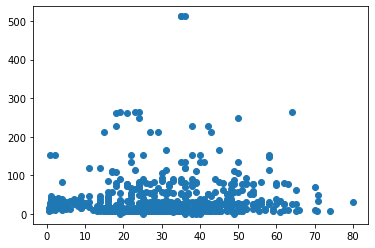

In [130]:
plt.scatter(x=train1['Age'], y =train1['Fare']) #연령대를 확인 하기위한 시각화

In [131]:
train1.isnull().sum()#결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [132]:
train1.groupby(['Embarked']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Embarked,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168
Q,77,77,77,77,77,28,77,77,77,77
S,644,644,644,644,644,554,644,644,644,644


In [133]:
train1['Embarked'].fillna(value = 's', inplace = True)

In [134]:
train1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [135]:
train1.mean()#평균대치를 할까?

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [136]:
train1.groupby('Sex')['Age'].agg(**{'mean_age':'mean'}) #성별 나이 평균 확인

,mean_age
Sex,
female,27.915709
male,30.726645


In [137]:
fill = {'female' : 28.0, 'male' : 31.0} #나이 결측값을 평균으로 할당하는 과정

In [199]:
trans = lambda g: g.fillna(fill[g.name])

In [200]:
train2 = train1.groupby(['Sex']).apply(trans)

In [201]:
train2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [202]:
train2 = train2.drop(['Name', 'Ticket', 'SibSp', 'Parch'], axis = 1)

In [203]:
train2

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,S
887,888,1,1,female,19.0,30.0000,S
888,889,0,3,female,28.0,23.4500,S
889,890,1,1,male,26.0,30.0000,C


In [204]:
train2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
dtype: int64

In [205]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [206]:
train2['Sex'] = train2['Sex'].map({'male' : 1, 'female' : 2})
train2['Embarked'] = train2['Embarked'].map({'S' : 1,'C' : 2, 'Q' : 3})#성별 숫자로 변경

In [207]:
train2.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,1,22.0,7.2500,1.0
1,2,1,1,2,38.0,71.2833,2.0
2,3,1,3,2,26.0,7.9250,1.0
3,4,1,1,2,35.0,53.1000,1.0
4,5,0,3,1,35.0,8.0500,1.0


In [208]:
train2.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,1,22.0,7.2500,1.0
1,2,1,1,2,38.0,71.2833,2.0
2,3,1,3,2,26.0,7.9250,1.0
3,4,1,1,2,35.0,53.1000,1.0
4,5,0,3,1,35.0,8.0500,1.0


In [209]:
#배깅

In [210]:
import os 
from sklearn.model_selection import train_test_split

In [213]:
feature = list(train2.columns.difference(['Survived']))
X = train2[feature] # 설명변수 
y = train2['Survived']         
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42) 
# 학습데이터와 평가데이터의 비율을 7:3

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

(623, 6) (268, 6) (623,) (268,)


In [214]:
bagging_prdict_result = []
for _ in range(10):
    data_index = [data_index for data_index in range(train_x.shape[0])]
    random_data_index = np.random.choice(data_index, train_x.shape[0])
    print(len(set(random_data_index)))

392
399
399
394
386
396
390
386
387
395
